# Problem 3: Inferential statistics

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

## Task 1.

In [2]:
np.random.seed(7)

step, start, stop = 1000, 100, 100000
mu, sigma = 1, 1
da={}

for n in range(start, stop, step):
    d = np.random.normal(mu, sigma, n)
    da['n'+str(n)] = d, n, np.mean(d), np.var(d), np.std(d)

### Sub-task (a)

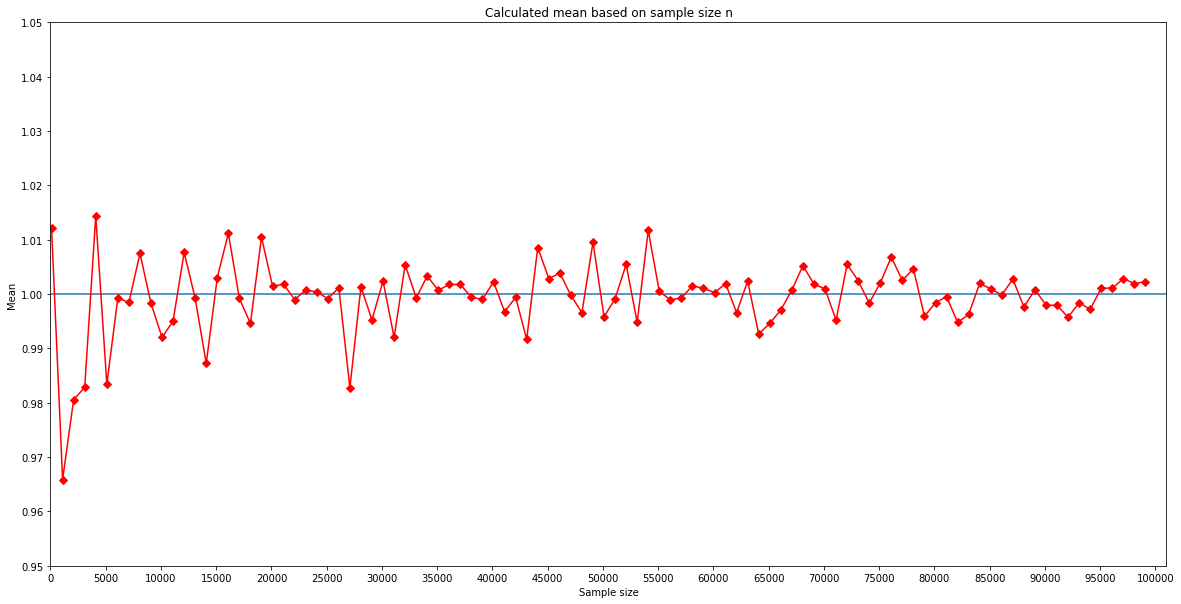

In [61]:
nList=[]
meanList=[]
for item in da:
    _, n, mean, _, _ = da[item]
    nList.append(n)
    meanList.append(mean)
    
plt.figure(figsize=(20,10))
plt.xlabel('Sample size')
plt.ylabel('Mean')
plt.xticks(np.arange(0, 100001, step=5000))
plt.yticks(np.arange(0.8, 1.2, step=0.01))
plt.axhline(y=1)
plt.ylim(0.95,1.05)
plt.xlim(0,101000)
plt.plot(nList, meanList, '-rD')
plt.title('Calculated mean based on sample size n')

plt.show()

From this plot we could derive that with increase of sample size the mean of each new sample is closer to expected value of 1. We could see that for samples of bigger size, on the right hand side of the plot, values of mean are closer to value of 1. While on the left hand side of plot, mean of sampels with smaller sizes deviates much more from expected value of 1. As result, we could derive that mean of sample converges to expected value with increase of sample size. 

### Sub-task (b)

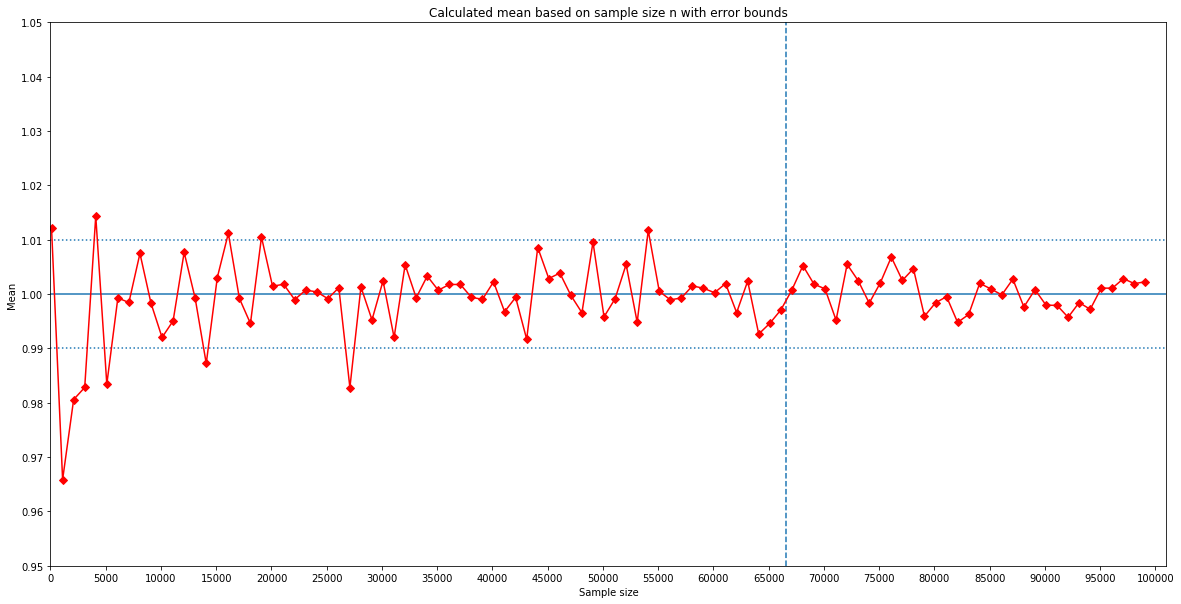

Sample size for deviation 0.01 n = 66564.0


In [67]:
nList=[]
meanList=[]
for item in da:
    _, n, mean, _, _ = da[item]
    nList.append(n)
    meanList.append(mean)
    
plt.figure(figsize=(20,10))
plt.xlabel('Sample size')
plt.ylabel('Mean')
plt.xticks(np.arange(0, 100001, step=5000))
plt.yticks(np.arange(0.8, 1.2, step=0.01))
plt.axhline(y=1)
plt.axvline(x=66564, ls='--')
plt.axhline(y=1.01, ls=':')
plt.axhline(y=0.99, ls=':')
plt.ylim(0.95,1.05)
plt.xlim(0,101000)
plt.plot(nList, meanList, '-rD')
plt.title('Calculated mean based on sample size n with error bounds')

plt.show()

E = 0.01
z99 = 2.58

print('Sample size for deviation 0.01 n =', (z99**2)/E**2)

If we use $\bar X$ as estimator and assume Normal distribution, then we could find number of observations needed to obtain estimator which is close to true value with deviation $\pm 0.01$ by using formula $\bar X \pm \frac{z \sigma}{\sqrt{n}}$ which is used for confidence interval calculation. Based on this formula we need to find such $n$ that $\frac{z \sigma}{\sqrt{n}} = \pm 0.01$, hence $ \frac{z \sigma}{\sqrt{n}}=0.01 \implies \sqrt{n} = \frac{z \sigma}{0.01} \implies n = \frac{z^2 \sigma ^2}{0.01^2}$. Let assume z-value for confidence interval of 99% $(z=2,58)$ and we will take $\sigma = 1$ which is known, hence $n = \frac{z^2 \sigma ^2}{0.01^2} = \frac{2.58^2 1^2}{0.01^2} = \frac{6.6564‬}{0.0001} = 66564$. So, with 99% of confidence we need at least 66564 observations to obtain an estimator which is close to the true value with deviation $\pm 0.01$.

### Sub-task (c)

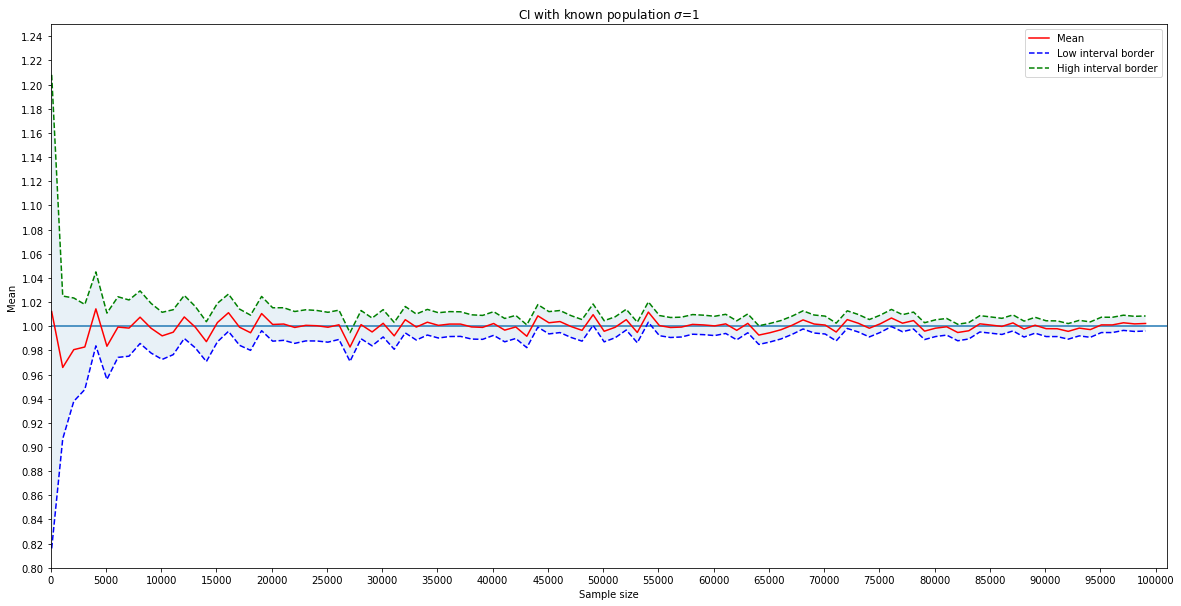

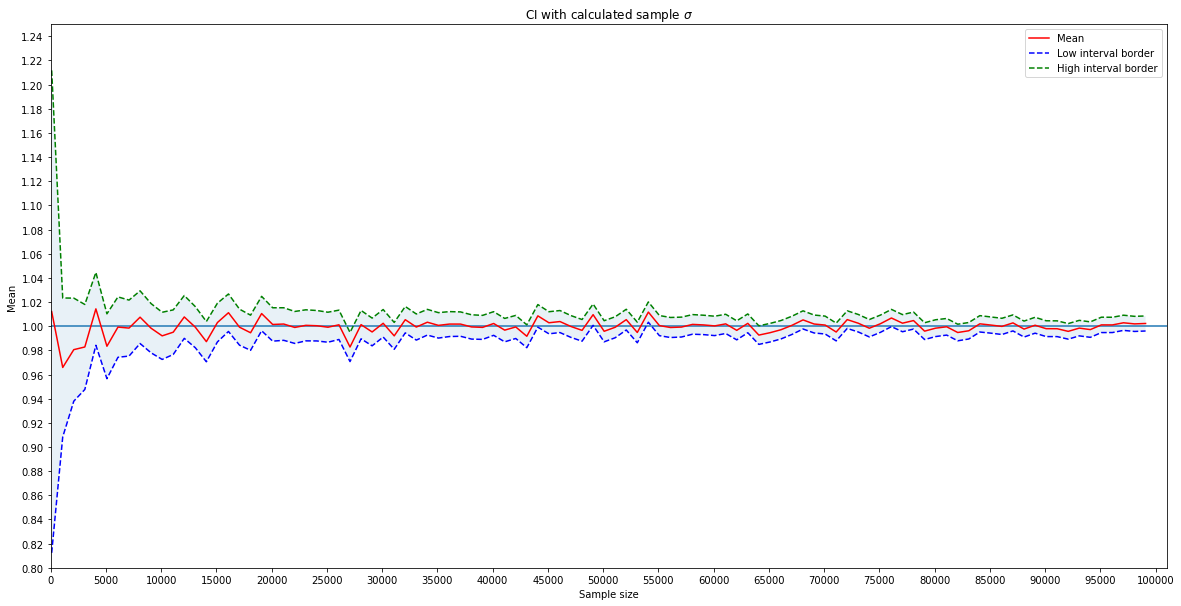

In [59]:
nList=[]
meanList=[]
meanLowList1=[]
meanHighList1=[]
meanLowList2=[]
meanHighList2=[]
stdList=[]
for item in da:
    _, n, mean, _, std = da[item]
    nList.append(n)
    meanList.append(mean)
    meanLowList1.append(mean-1.96/np.sqrt(n))
    meanHighList1.append(mean+1.96/np.sqrt(n))
    stdList.append(std)
    meanLowList2.append(mean-(1.96*std)/np.sqrt(n))
    meanHighList2.append(mean+(1.96*std)/np.sqrt(n))

plt.figure(figsize=(20,10))
plt.xlabel('Sample size')
plt.ylabel('Mean')
plt.xticks(np.arange(0, 100001, step=5000))
plt.yticks(np.arange(0.8, 1.25, step=0.02))
plt.axhline(y=1)
plt.ylim(0.8,1.25)
plt.xlim(0,101000)
plt.plot(nList, meanList, '-r', label='Mean')
plt.plot(nList, meanLowList1, '--b', label='Low interval border')
plt.plot(nList, meanHighList1, '--g', label='High interval border')
plt.fill_between(nList, meanLowList1, meanHighList1, alpha=0.1)
plt.legend()
plt.title('CI with known population $\sigma$=1')


plt.figure(figsize=(20,10))
plt.xlabel('Sample size')
plt.ylabel('Mean')
plt.xticks(np.arange(0, 100001, step=5000))
plt.yticks(np.arange(0.8, 1.25, step=0.02))
plt.axhline(y=1)
plt.ylim(0.8,1.25)
plt.xlim(0,101000)
plt.plot(nList, meanList, '-r', label='Mean')
plt.plot(nList, meanLowList2, '--b', label='Low interval border')
plt.plot(nList, meanHighList2, '--g', label='High interval border')
plt.fill_between(nList, meanLowList2, meanHighList2, alpha=0.1)
plt.legend()
plt.title('CI with calculated sample $\sigma$')

plt.show()

Confidence interval, displayed on the plots above, shows that with 95% confidence Mean of generated random samples will be within indicated limits. Also, we could notice that confidence interval become more narrow with increase of n - which is another indication that increase of sample size improve estimator accuracy. Another conclusion we could derive is that confidence interval built with known $\sigma = 1$ and with $\sigma$ calculated from samples deviates very little. Only noticable difference exist with smallest sample size $(n=100)$. Hence with increase of sample size calculated Mean and Variance could be used as good approximation in cases when real $\mu$ and $\sigma^2$ are not known.

Since we know that distribution is a Normal symmetric distribution, then confidence interval calculated based on formula $[\bar X_i - \frac{z \sigma}{\sqrt{n}} , \bar X_i + \frac{z \sigma}{\sqrt{n}}]$, where z is respective z-value for 95% of confidence $(z=1.96)$ and $\bar X_i$ is a Mean of $i-th$ sample.

### Sub-task (d)

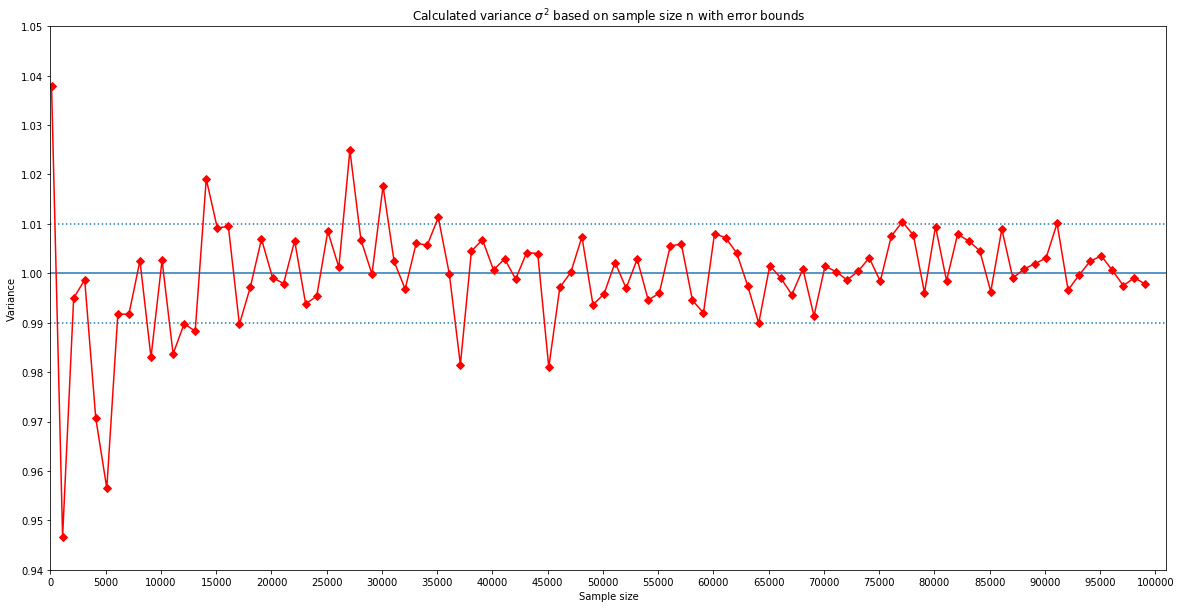

In [63]:
nList=[]
varList=[]
for item in da:
    _, n, _, var, _ = da[item]
    nList.append(n)
    varList.append(var)
    
plt.figure(figsize=(20,10))
plt.xlabel('Sample size')
plt.ylabel('Variance')
plt.xticks(np.arange(0, 100001, step=5000))
plt.yticks(np.arange(0.8, 1.2, step=0.01))
plt.axhline(y=1)
plt.axhline(y=1.01, ls=':')
plt.axhline(y=0.99, ls=':')
plt.ylim(0.94,1.05)
plt.xlim(0,101000)
plt.plot(nList, varList, '-rD')
plt.title('Calculated variance $\sigma^2$ based on sample size n with error bounds')

plt.show()

From this plot we could derive that with increase of sample size the variance of each new sample is closer to expected value of 1. We could see that for samples of bigger size, on the right hand side of the plot, values of variance are closer to value of 1. While on the left hand side of plot, variance of sampels with smaller sizes deviates much more from expected value of 1. As result, we could derive that variance of sample converges to expected value with increase of sample size. However, it looks like variance deviates more from expected value then a mean and converges slowly to 1. I think it is caused by fact that variance is squared. In general, with big size of sample calculaed variance could be a good estimator for real unknown variance, but not for smaller sample sizes.

Consistency is a quality which holds true in any conditions. Since variance for smaller sapmle size deviates more then for bigger sample sizes, we could derive it is not a consistent estimator.

## Task 2